In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# File to Load (Remember to change these)
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
#city_data.head()
df_city_data = pd.DataFrame(city_data)
#df_city_data
df_city_data_for_type = df_city_data

ride_data = pd.read_csv(ride_data_to_load)
df_ride_data = pd.DataFrame(ride_data)              
#df_ride_data                   
                        

# Combine the data into a single dataset
df_merged_city_ride = pd.merge(df_city_data, df_ride_data, on="city", suffixes=("_City", "_Ride"))
df_merged_city_ride_type = pd.merge(df_city_data, df_ride_data, on="city", suffixes=("_City", "_Ride"))                  

# Display the data table for preview
df_merged_city_ride.head()
#df_merged_city_ride_type.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#df_merged_city_ride.sort_values(by='city', inplace=True)
df_merged_city_ride_indexed=df_merged_city_ride.set_index('city')
#df_merged_city_ride_indexed
df_merged_city_ride_indexed.sort_values('city', inplace=True)
df_merged_city_ride_indexed_grouped = df_merged_city_ride_indexed.groupby('city')
df_merged_city_ride_indexed_grouped.head()


,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421
Barajasview,26,Urban,2018-04-09 08:10:39,39.36,1801612492097
Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481
Barajasview,26,Urban,2018-01-23 13:23:53,37.68,4108452999906
Barajasview,26,Urban,2018-02-08 18:07:22,24.49,2612169071005


In [4]:
print("here")

here


In [5]:
print("here2")

here2


In [6]:
df_merged_city_ride_type_indexed = df_merged_city_ride_type.sort_values('type')
cityTypes = df_merged_city_ride_type_indexed['type'].unique().tolist()
print(f'City Types: {cityTypes}')
colors = ['Gold', 'skyBlue', 'Coral']
print(f'Color: {colors}')
explode = (0, 0, 0.1)

#df_merged_city_ride_type_indexed_grouped = df_merged_city_ride_type_indexed.groupby('type')
#df_merged_city_ride_type_indexed_grouped
totalFareByType = df_merged_city_ride_type_indexed.groupby('type')['fare'].sum().tolist()
print(f'totalFareByType: {totalFareByType}')


City Types: ['Rural', 'Suburban', 'Urban']
Color: ['Gold', 'skyBlue', 'Coral']
totalFareByType: [4327.929999999999, 19356.330000000005, 39854.38000000003]


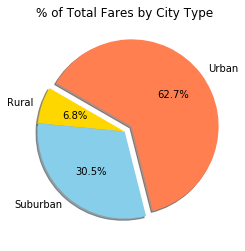

In [7]:
plt.pie(totalFareByType, explode=explode, labels=cityTypes, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

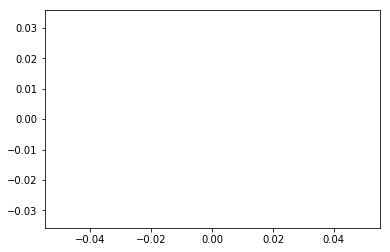

In [8]:
plt.axis("equal")

In [9]:
#df_merged_city_ride_type_indexed = df_merged_city_ride_type.sort_values('type')
#cityTypes = df.merged_city_ride_type_indexed['type'].unique().tolist()
print(f'City Types: {cityTypes}')
#colors = ['Gold', 'skyBlue"', 'Coral']
print(f'Color: {colors}')
explode = (0, 0, 0.1)

#df_merged_city_ride_type_indexed_grouped = df_merged_city_ride_type_indexed.groupby('type')
#df_merged_city_ride_type_indexed_grouped
totalRideByType = df_merged_city_ride_type_indexed.groupby('type')['ride_id'].sum().tolist()
print(f'totalRideByType: {totalRideByType}')

City Types: ['Rural', 'Suburban', 'Urban']
Color: ['Gold', 'skyBlue', 'Coral']
totalRideByType: [580968240341287, 3106884522576766, 7919412664056093]


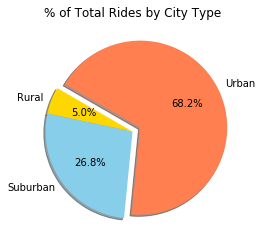

In [10]:
plt.pie(totalRideByType, explode=explode, labels=cityTypes, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

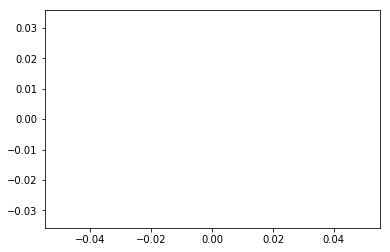

In [11]:
plt.axis("equal")

In [12]:
print("here 3")

here 3


In [13]:
#df_merged_city_ride_type_indexed = df_merged_city_ride_type.sort_values('type')
#cityTypes = df.merged_city_ride_type_indexed['type'].unique().tolist()
print(f'City Types: {cityTypes}')
#colors = ['Gold', 'skyBlue"', 'Coral']
print(f'Color: {colors}')
explode = (0, 0, 0.1)

#df_merged_city_ride_type_indexed_grouped = df_merged_city_ride_type_indexed.groupby('type')
#df_merged_city_ride_type_indexed_grouped
totalDriverCountByType = df_merged_city_ride_type_indexed.groupby('type')['driver_count'].sum().tolist()
print(f'totalRideByType: {totalDriverCountByType}')



City Types: ['Rural', 'Suburban', 'Urban']
Color: ['Gold', 'skyBlue', 'Coral']
totalRideByType: [537, 8570, 59602]


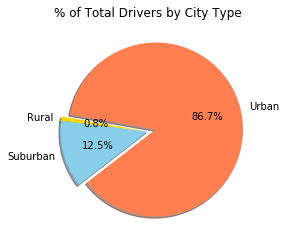

In [14]:
plt.pie(totalDriverCountByType, explode=explode, labels=cityTypes, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
plt.show()

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

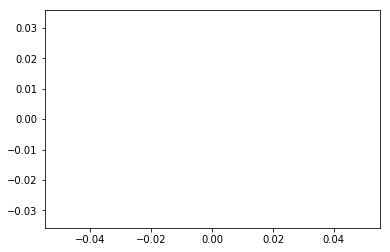

In [15]:
plt.axis("equal")

In [16]:
print("here 4")


here 4


In [35]:
#df_merged_city_ride.sort_values(by='city', inplace=True)
df_merged_city_ride_indexed=df_merged_city_ride.set_index('city')
#df_merged_city_ride_indexed
df_merged_city_ride_indexed.sort_values('city', inplace=True)
df_merged_city_ride_indexed_grouped = df_merged_city_ride_indexed.groupby('city')
df_merged_city_ride_indexed_grouped.head()

# Average Fare ($) Per City
averageFarePerCity = df_merged_city_ride_indexed_grouped['fare'].mean().tolist()
#print(f'Average Fare ($) Per City: \n  {averageFarePerCity}')


# Total Number of Rides Per City
totalNumOfRidePerCity = df_merged_city_ride_indexed_grouped['ride_id'].count().tolist()
#print(f'Total Number of Rides Per City: \n {totalNumOfRidePerCity}')


# Total Number of Drivers Per City
totalNumOfDriverPerCity = df_merged_city_ride_indexed_grouped['driver_count'].sum()
#print(f'Total Number of Drivers Per City: \n {totalNumOfDriverPerCity}')

typeColors = [{"Rural" : "Gold"}, {"Suburban" : "skyBlue"}, {"Urban" : "Coral"}]
print(f'City Types: {cityTypes}')
print(f'Color: {colors}')
print(f'Type and Color: {typeColors}')
colordict = dict(zip(cityTypes, colors))
print(f'{colordict}')    

City Types: ['Rural', 'Suburban', 'Urban']
Color: ['Gold', 'skyBlue', 'Coral']
Type and Color: [{'Rural': 'Gold'}, {'Suburban': 'skyBlue'}, {'Urban': 'Coral'}]
{'Rural': 'Gold', 'Suburban': 'skyBlue', 'Urban': 'Coral'}


Text(0, 0.5, 'Average Fare ($)')

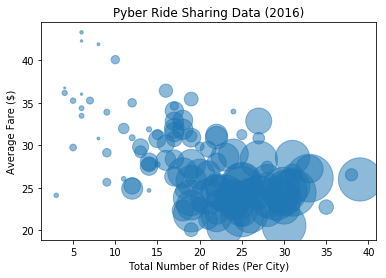

In [36]:
plt.scatter(x=totalNumOfRidePerCity, y=averageFarePerCity, s=totalNumOfDriverPerCity, alpha=0.5)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend for our chart
#plt.legend(handles=[cityTypes], loc="best")


In [26]:
print("here 5")

here 5


In [72]:
colordict = dict(zip(cityTypes, colors))
print(f'{colordict}')   
df_merged_city_ride_type["color"]=df_merged_city_ride_type['type'].apply(lambda x: colordict[x])
#df_merged_city_ride_type['type'].apply(lambda x: colordict[x])
df_merged_city_ride_type.head()
#df_merged_city_ride_type["color"]

{'Rural': 'Gold', 'Suburban': 'skyBlue', 'Urban': 'Coral'}


,city,driver_count,type,date,fare,ride_id,color
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794,Coral
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494,Coral
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416,Coral
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413,Coral
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850,Coral


In [64]:
df_merged_city_ride_type_indexed = df_merged_city_ride_type.set_index('city')
df_merged_city_ride_type_indexed.sort_values('city', inplace=True)
df_bubble = df_merged_city_ride_type_indexed.groupby('city')
df_bubble.head()
#colorTest = df_bubble['color'].unique()
#print(f'{colorTest}')

,driver_count,type,date,fare,ride_id,color
city,,,,,,
Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763,Coral
Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753,Coral
Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674,Coral
Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492,Coral
Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421,Coral
Barajasview,26,Urban,2018-04-09 08:10:39,39.36,1801612492097,Coral
Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481,Coral
Barajasview,26,Urban,2018-01-23 13:23:53,37.68,4108452999906,Coral
Barajasview,26,Urban,2018-02-08 18:07:22,24.49,2612169071005,Coral


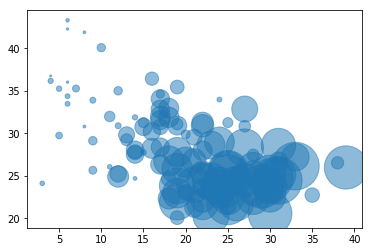

In [68]:
#plt.scatter(x=df_bubble['ride_id'].count(), y=df_bubble['fare'].mean(), s=df_bubble['driver_count'].sum(), alpha=0.5)

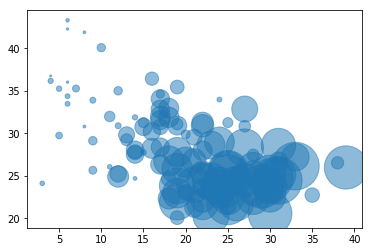

In [74]:
plt.scatter(x=df_bubble['ride_id'].count(), y=df_bubble['fare'].mean(), s=df_bubble['driver_count'].sum(), alpha=0.5)

## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


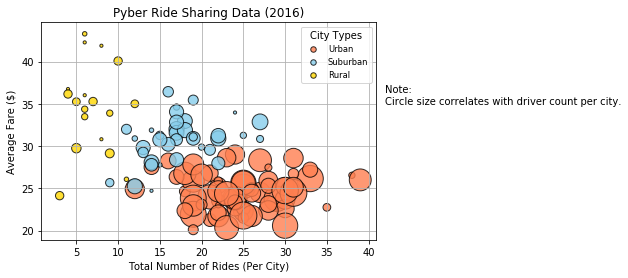

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


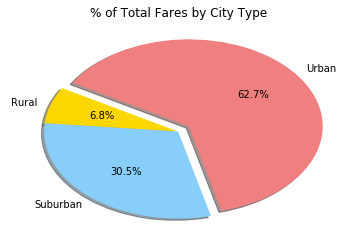

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


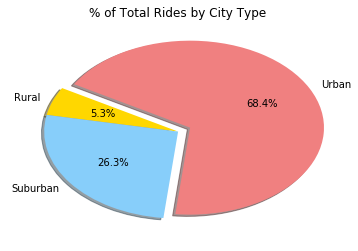

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


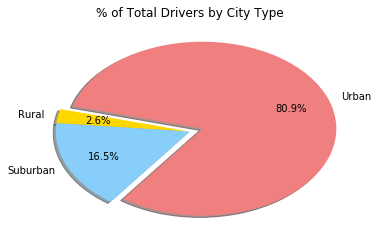

In [6]:
# Show Figure
plt.show()